<a href="https://colab.research.google.com/github/vak1997/vak1997-Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
# mount the gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing the libraries**

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import the data
sales_df=pd.read_csv("/content/drive/MyDrive/Data & Resources/Rossmann Stores Data.csv")
stores_df=pd.read_csv("/content/drive/MyDrive/Data & Resources/store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Data Information**

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## **Inference:**



*   Sales data have **9 columns and 1017209 rows**
*   There are no null values in sales data

*   Our task is forecast the sales, so we need to convert data type of Date column to date time and arrange it in sorted order to predict the sales







## **Inference**


*   Store Data have 1115 rows and 10 columns
*   It has null values in CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval columns. we need to drop or fill some values in the column depend on need of analysis



# **Data Cleaning and Preparation**

**Converting Date into date format and  Extracting the parts of date like year, month and day**

In [ ]:
#converting to date format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
#getting year from date
sales_df['Year'] = sales_df.Date.dt.year
#getting month from date
sales_df['Month'] = sales_df.Date.dt.month
#getting day from date
sales_df['Day'] = sales_df.Date.dt.day
#getting week of year from date
sales_df['WeekOfYear'] = sales_df.Date.dt.isocalendar().week

In [ ]:
#checking the new columns
sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31
5,6,5,2015-07-31,5651,589,1,1,0,1,2015,7,31,31
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015,7,31,31
7,8,5,2015-07-31,8492,833,1,1,0,1,2015,7,31,31
8,9,5,2015-07-31,8565,687,1,1,0,1,2015,7,31,31
9,10,5,2015-07-31,7185,681,1,1,0,1,2015,7,31,31


In [ ]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Inference:**

> Since competition distance have 3 missing values, we will fill those values with median based on store type


> For missing in competition open since month and competition since year, we will assume the competition store closed and fill -1 for it

> If Promo2 is zero, then there will be no Promo2SinceWeek, Promo2SinceYear and PromoInterval so we can fill that also as -1







In [ ]:
#function for filling the null value based on the store type competition distance median value
def fill_null(type1,store):
  #getting the median competition distance value of store type
  x=stores_df.groupby('StoreType').CompetitionDistance.median()[type1]
  # filling that values into missng values
  stores_df.loc[stores_df.Store==store,'CompetitionDistance']=x


In [ ]:
# apply the fill null udf function to missing values 
stores_df[stores_df['CompetitionDistance'].isnull()].apply(lambda x: fill_null(x['StoreType'],x['Store']),axis=1)

290    None
621    None
878    None
dtype: object

In [ ]:
#checking the null values are filled or not
stores_df[stores_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
# filling -1 for Promo2SinceWeek and Promo2SinceYear columns where promo 2 is zero
stores_df.loc[stores_df.Promo2==0,'Promo2SinceWeek']=-1
stores_df.loc[stores_df.Promo2==0,'Promo2SinceYear']=-1
#stores_df.loc[stores_df.Promo2==0,'PromoInterval']=-1

In [ ]:
stores_df[stores_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,-1.0,-1.0,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,-1.0,-1.0,NaN
1113,1114,a,c,870.0,NaN,NaN,0,-1.0,-1.0,NaN


In [ ]:
#showing the count mean, median, min and max of all numeric columns of store data
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,761.000000,761.000000,1115.000000,1115.000000,1115.00000
mean,558.00000,5401.004484,7.224704,2008.668857,0.512108,11.595516,1029.75157
std,322.01708,7653.630290,3.212348,6.195983,0.500078,15.925223,1006.53886
min,1.00000,20.000000,1.000000,1900.000000,0.000000,-1.000000,-1.00000
25%,279.50000,720.000000,4.000000,2006.000000,0.000000,-1.000000,-1.00000
50%,558.00000,2330.000000,8.000000,2010.000000,1.000000,1.000000,2009.00000
75%,836.50000,6875.000000,10.000000,2013.000000,1.000000,22.000000,2012.00000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.00000


**Checking Duplicated Values**

In [ ]:
#checking no of duplicates in stores data
stores_df.duplicated().sum()

0

In [ ]:
#checking no of duplicates in sales data
sales_df.duplicated().sum()

0

**Inference**


> No Duplicate rows are found



**Remove leading spaces (Data Quality error)**

In [ ]:
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

It shows two zero category, that is wrong in the data, we need to removes addtional spaces

In [ ]:
#remove additional spaces in columnsus rstrip function
sales_df['StateHoliday']=sales_df['StateHoliday'].apply(lambda x:str(x).rstrip(" "))

**Merging two tables**

In [ ]:
# join the stores and sales data to create overall data set for sales predition analysis
ross_df=sales_df.merge(stores_df, how='left', on='Store')

In [ ]:
#verifying the merged data, by sessing top 10 rows
ross_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,2015,...,31,a,a,310.0,12.0,2013.0,0,-1.0,-1.0,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015,...,31,a,c,24000.0,4.0,2013.0,0,-1.0,-1.0,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,2015,...,31,a,a,7520.0,10.0,2014.0,0,-1.0,-1.0,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,2015,...,31,a,c,2030.0,8.0,2000.0,0,-1.0,-1.0,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,2015,...,31,a,a,3160.0,9.0,2009.0,0,-1.0,-1.0,NaN


In [ ]:
# create competition open column which denotes the number of months for which a competitor has been open near the store.
ross_df['CompetitionOpen'] = 12 * (ross_df.Year - ross_df.CompetitionOpenSinceYear) + (ross_df.Month - ross_df.CompetitionOpenSinceMonth)
ross_df['CompetitionOpen'] = ross_df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,NaN,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,NaN,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,c,c,1880.0,4.0,2006.0,0,-1.0,-1.0,NaN,81.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,a,c,9260.0,NaN,NaN,0,-1.0,-1.0,NaN,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,a,c,870.0,NaN,NaN,0,-1.0,-1.0,NaN,0.0


In [ ]:
# create promo2open column which denotes the number of months for which a promo has been open
ross_df['Promo2Open'] = 12 * (ross_df.Year - ross_df.Promo2SinceYear) +  (ross_df.WeekOfYear - ross_df.Promo2SinceWeek)*7/30.5
ross_df['Promo2Open'] = ross_df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * ross_df['Promo2']

In [ ]:
#user defined function to check the date is in promo month or not
def promo_month(df):
    month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (df['PromoInterval'] or '').split(',')
        if df['Promo2Open'] is True and month_dict[df['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

In [ ]:
# create promo month column 
ross_df['IsPromo2Month'] = ross_df.apply(promo_month, axis=1) * ross_df['Promo2']

# **EXPLORATORY DATA ANALYSIS**

**Promo Analysis**


We already knows that promo is very important marketing stragety for increasing customer which increase Sales, we will check from this data how our assumptions are working.

**Promo VS Customers**

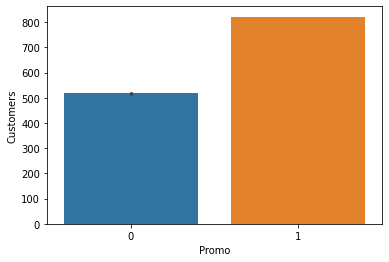

In [ ]:
sns.barplot(x=ross_df['Promo'],y=ross_df['Customers'])

**Inference:**
It shows significant increase in customers on promotion stores, so Customers and promotion have positive correlation 

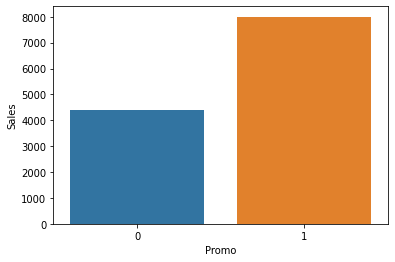

In [ ]:
sns.barplot(x=ross_df['Promo'],y=ross_df['Sales'])

**Inference:**
It shows significant increase in Sales also on promotion stores, so Sales and promotion also have positive correlation 

**Store open or closed based Analysis**

0 means closed
1 means opened


Text(0.5, 1.0, "store's open status in relation to day of the week")

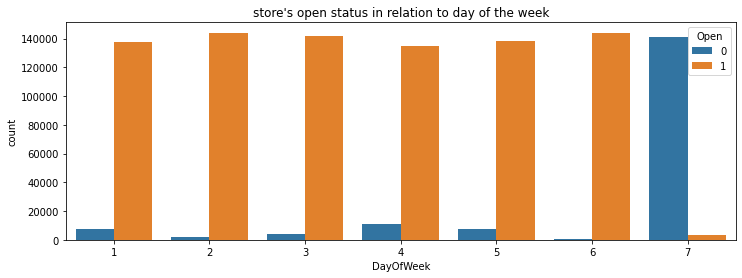

In [ ]:
#let's explore store open in relation to day of week
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for Days of week Vs Store open
sns.countplot(x='DayOfWeek',hue='Open', data=ross_df, ax=axis1)
plt.title("store's open status in relation to day of the week")

**Inference:**

It clearly shows the store are open 6 days a week, and majority of stores are closed on Sundays


Text(0.5, 1.0, "store's open status in relation to State Holiday")

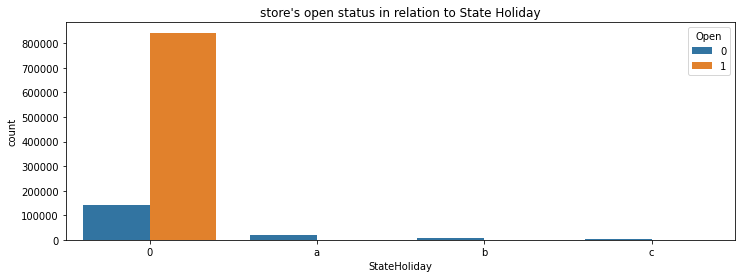

In [ ]:
#let's explore open in relation to State Holiday
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for State Holiday Vs Store open
sns.countplot(x='StateHoliday',hue='Open', data=ross_df, ax=axis1)
plt.title("store's open status in relation to State Holiday")

0 means no holiday
It shows nearly all shops are closed during state holidays 

Text(0.5, 1.0, "store's open status in relation to School holiday")

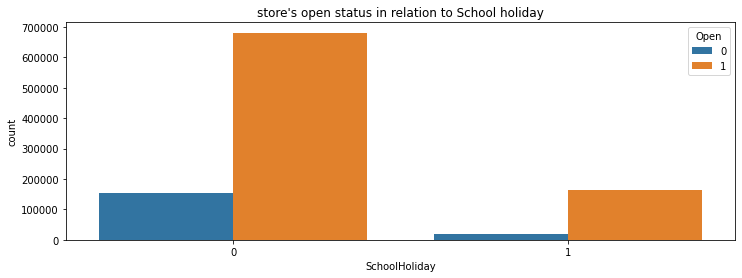

In [ ]:
#let's explore open in relation to SchoolHoliday
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for School Holiday Vs Store open
sns.countplot(x='SchoolHoliday',hue='Open', data=ross_df, ax=axis1)
plt.title("store's open status in relation to School holiday")

It shows some of shops open during school holidays